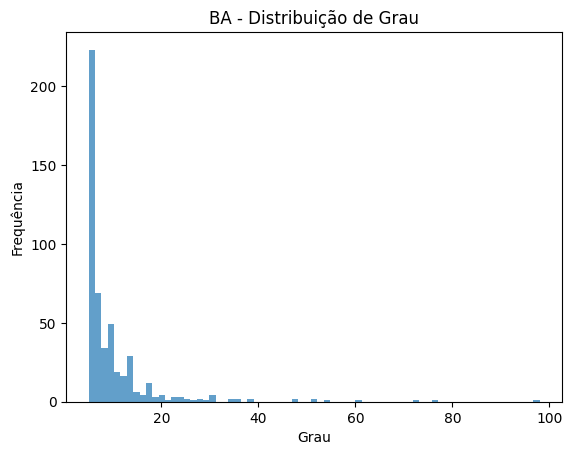

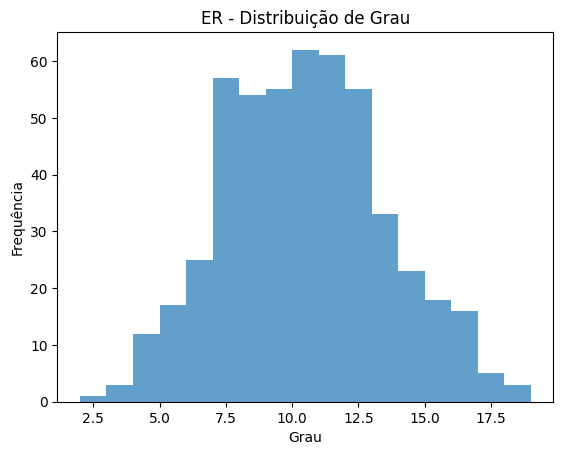

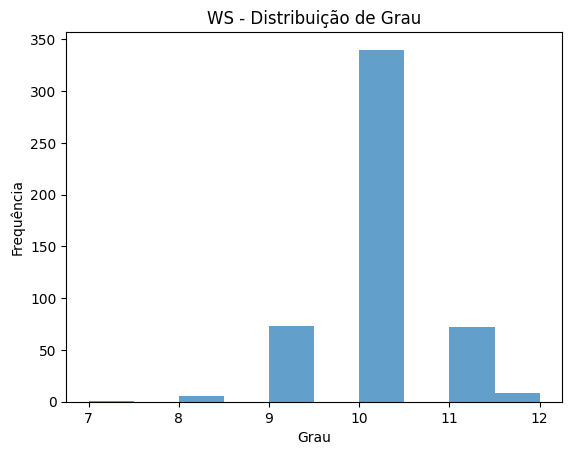

Coeficiente de Clusterização Médio:
BA: 0.06163737705137729
ER: 0.019500644470768307
WS: 0.5849748917748923
Comprimento Médio do Caminho:
BA: 2.7754388777555112
ER: 2.944801603206413
WS: 4.715366733466934
Coeficiente de Assortatividade:
BA: -0.06132191536411322
ER: -0.011996466145321481
WS: 0.03904423859408603


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parâmetros
n_nodes = 500
avg_degree = 10
p = 0.05

# Gerar redes BA, ER e WS
ba_graph = nx.barabasi_albert_graph(n_nodes, avg_degree // 2)
er_graph = nx.erdos_renyi_graph(n_nodes, avg_degree / (n_nodes - 1))
ws_graph = nx.watts_strogatz_graph(n_nodes, avg_degree, p)

# Plotar histograma da distribuição de grau
def plot_degree_distribution(graph, title):
    degrees = [degree for node, degree in graph.degree()]
    plt.hist(degrees, bins='auto', alpha=0.7)
    plt.xlabel("Grau")
    plt.ylabel("Frequência")
    plt.title(title)
    plt.show()

plot_degree_distribution(ba_graph, "BA - Distribuição de Grau")
plot_degree_distribution(er_graph, "ER - Distribuição de Grau")
plot_degree_distribution(ws_graph, "WS - Distribuição de Grau")

# Calcular coeficiente de clusterização médio
avg_cluster_ba = nx.average_clustering(ba_graph)
avg_cluster_er = nx.average_clustering(er_graph)
avg_cluster_ws = nx.average_clustering(ws_graph)

print("Coeficiente de Clusterização Médio:")
print("BA:", avg_cluster_ba)
print("ER:", avg_cluster_er)
print("WS:", avg_cluster_ws)

# Calcular comprimento médio do caminho
avg_path_length_ba = nx.average_shortest_path_length(ba_graph)
avg_path_length_er = nx.average_shortest_path_length(er_graph)
avg_path_length_ws = nx.average_shortest_path_length(ws_graph)

print("Comprimento Médio do Caminho:")
print("BA:", avg_path_length_ba)
print("ER:", avg_path_length_er)
print("WS:", avg_path_length_ws)

# Calcular coeficiente de assortatividade
assortativity_ba = nx.degree_assortativity_coefficient(ba_graph)
assortativity_er = nx.degree_assortativity_coefficient(er_graph)
assortativity_ws = nx.degree_assortativity_coefficient(ws_graph)

print("Coeficiente de Assortatividade:")
print("BA:", assortativity_ba)
print("ER:", assortativity_er)
print("WS:", assortativity_ws)

In [7]:
import networkx as nx
import gudhi

def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

def betti_numbers(G):
    # Obter a lista de cliques para cada rede
    cliques = list(nx.enumerate_all_cliques(G))

    # Criar o complexo simplicial a partir das listas de cliques
    complex = gudhi.SimplexTree()
    for clique in cliques:
        complex.insert(clique)

    # Calcula homologia do complexo simplicial
    complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    # Retorna números de Betti da homologia calculada
    betti_num = complex.betti_numbers()
    vector_len = 4
    betti_num = betti_num[:vector_len]
    # homogenização do tamanho do vetor a ser retornado
    if (len(betti_num) < vector_len):
        betti_num = np.pad(betti_num, (0, vector_len - len(betti_num)), mode='constant')
    
    return betti_num
    

# Parâmetros dados
n_nodes = 500
av_degree = 10

# Parâmetros calculados
p = av_degree/(n_nodes-1)
m = int(av_degree/2)
k = int(av_degree)

def m_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])

for i in range(3):
    # Erdos-Reni
    GER = nx.erdos_renyi_graph(n_nodes, p, seed=None, directed=False)
    # Barabasi-Albert
    GBA = nx.barabasi_albert_graph(n_nodes, m, seed=None)
    # Small-world
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    
    er_betti = betti_numbers(GER)
    ba_betti = betti_numbers(GBA)
    ws_betti = betti_numbers(GWS)
        
    print(f"betti_numbers(GER) = {[round(result, 2) for result in er_betti]}")
    print(f"betti_numbers(GBA) = {[round(result, 2) for result in ba_betti]}")
    print(f"betti_numbers(GWS) = {[round(result, 2) for result in ws_betti]}")
    
    GER = m_component(GER)
    GBA = m_component(GBA)
    GWS = m_component(GWS)

    er_measures = measures(GER)
    ba_measures = measures(GBA)
    ws_measures = measures(GWS)

    print(f"measures(GER) = {[round(result, 2) for result in er_measures]}")
    print(f"measures(GBA) = {[round(result, 2) for result in ba_measures]}")
    print(f"measures(GWS) = {[round(result, 2) for result in ws_measures]}")

betti_numbers(GER) = [1, 1916, 0]
betti_numbers(GBA) = [1, 1277, 4]
betti_numbers(GWS) = [1, 58, 0]
measures(GER) = [10.35, 116.97, 9.81, 0.02, 2.9, 0.01]
measures(GBA) = [9.9, 192.11, 94.1, 0.07, 2.74, -0.1]
measures(GWS) = [10.0, 100.21, 0.21, 0.62, 5.65, 0.05]
betti_numbers(GER) = [1, 1796, 0]
betti_numbers(GBA) = [1, 1339, 4]
betti_numbers(GWS) = [1, 53, 0]
measures(GER) = [9.86, 107.55, 10.33, 0.02, 2.95, 0.01]
measures(GBA) = [9.9, 184.04, 86.03, 0.07, 2.76, -0.08]
measures(GWS) = [10.0, 100.2, 0.2, 0.63, 5.74, -0.02]
betti_numbers(GER) = [1, 1802, 0]
betti_numbers(GBA) = [1, 1361, 7]
betti_numbers(GWS) = [1, 49, 0]
measures(GER) = [9.84, 106.05, 9.31, 0.02, 2.95, -0.0]
measures(GBA) = [9.9, 178.68, 80.67, 0.06, 2.78, -0.07]
measures(GWS) = [10.0, 100.2, 0.2, 0.63, 5.98, 0.0]


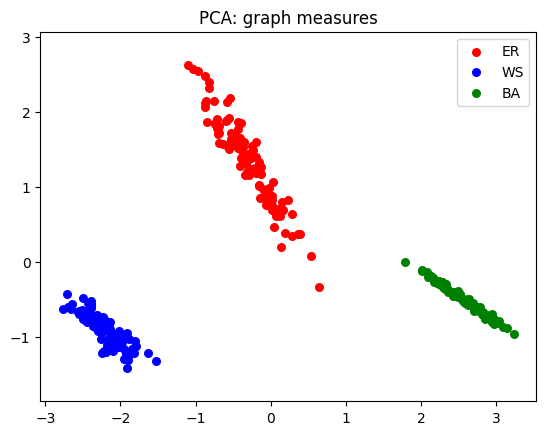

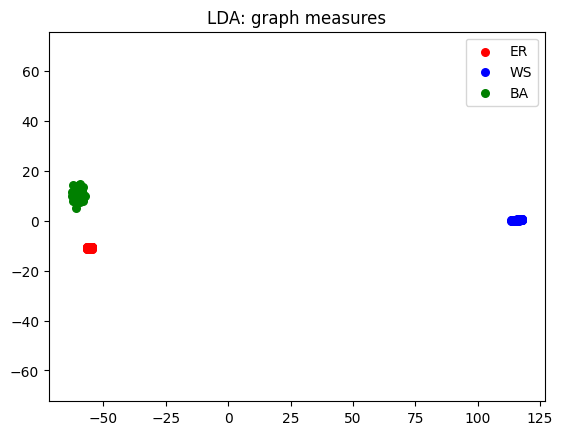

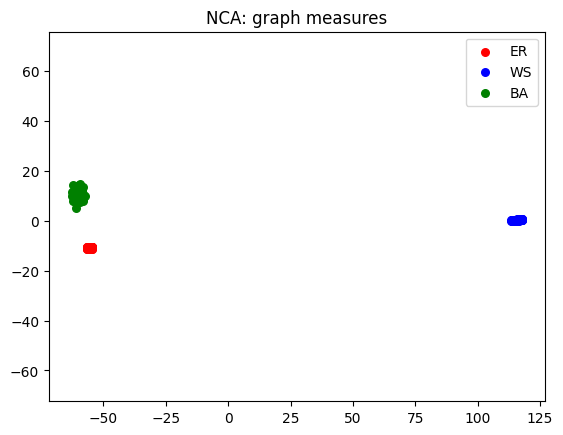

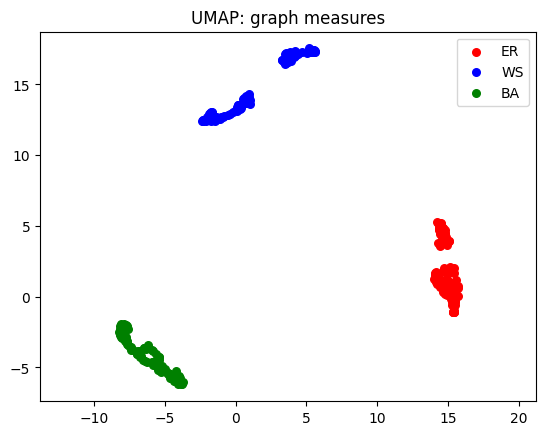

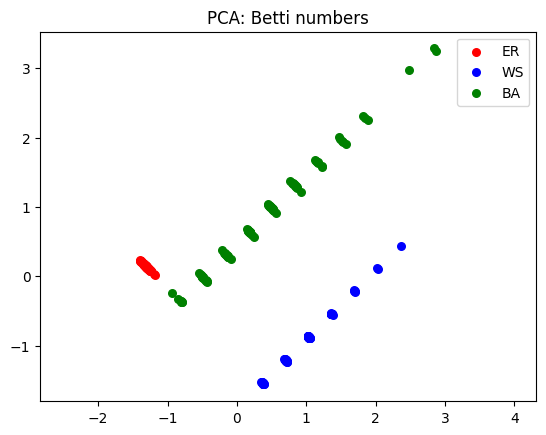

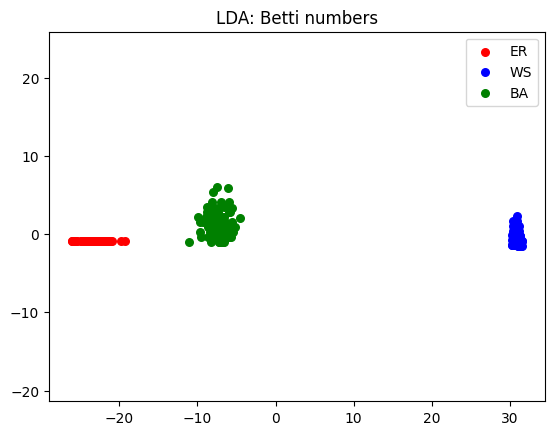

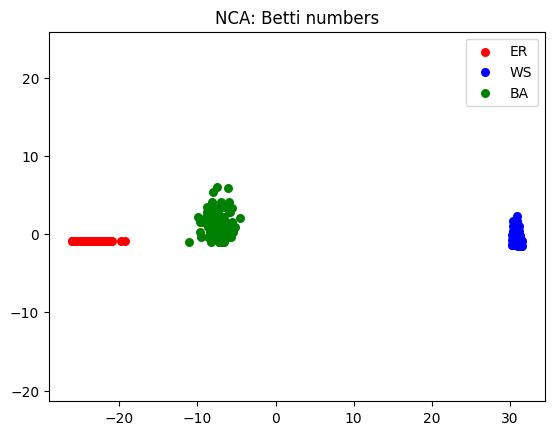

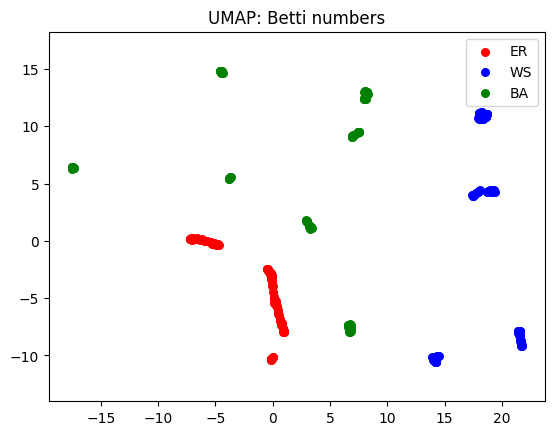

In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import gudhi
import umap

# Calcula algumas medidas de redes complexas
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

# Calcula números de Betti da rede
def betti_numbers(G):
    # Obter a lista de cliques para cada rede
    cliques = list(nx.enumerate_all_cliques(G))

    # Criar o complexo simplicial a partir das listas de cliques
    complex = gudhi.SimplexTree()
    for clique in cliques:
        complex.insert(clique)

    # Calcula homologia do complexo simplicial
    complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    # Retorna números de Betti da homologia calculada
    betti_num = complex.betti_numbers()
    
    # homogenização do tamanho do vetor a ser retornado
    vector_len = 4
    betti_num = betti_num[:vector_len]
    if (len(betti_num) < vector_len):
        betti_num = np.pad(betti_num, (0, vector_len - len(betti_num)), mode='constant')
    
    return betti_num

# Parâmetros de simulação
n_nets = 100  # Quantidade de redes
n_nodes = 500  # Quantidade de vértices
av_degree = 10 # Grau médio

# Vetores para impressão de resultados
X_measures = []
X_betti_num = []
y = []


#ER networks
p = av_degree/(n_nodes-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(n_nodes, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GER)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GER)
    X_betti_num.append(x)
    y.append(0)

#WS networks
k = int(av_degree)
p = 0.05 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GWS)
    X_betti_num.append(x)
    y.append(1)

# BA networks
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(n_nodes, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r = measures(GBA)
    x = [k1,k2,variance,av_cl,l,r]
    X_measures.append(x)
    x = betti_numbers(GBA)
    X_betti_num.append(x)
    y.append(2)
    
y = np.array(y)

# Padroniza os recursos removendo a média e dimensionando para a variância da unidade.
scaler = StandardScaler().fit(X_measures)
X_measures = scaler.transform(X_measures)

scaler = StandardScaler().fit(X_betti_num)
X_betti_num = scaler.transform(X_betti_num)

# Reduz para 2 dimensões com PCA Principal Component Analysis
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))

# Reduz para 2 dimensões com Linear Discriminant Analysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduz para 2 dimensões com 2 with Neighborhood Component Analysis
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=0))

# Reduz para 2 dimensões com Uniform Manifold Approximation and Projection
uma = umap.UMAP()

dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca), ("UMAP", uma)]

cl = ['ER','WS','BA']

# Define colors for each class and for the test case
colors = ['red', 'blue', 'green' ]

# Plot each method's projection
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Fit the method's model
    model.fit(X_measures, y)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_measures)
    
    for j in range(len(cl)):
        plt.scatter(
            X_embedded[y == j, 0],
            X_embedded[y == j, 1],
            c=colors[j],
            s=30,
            label=cl[j],
        )
    plt.legend()
    plt.title(name + ": graph measures")
    plt.axis('equal')
    
plt.show()

# Plot each method's projection
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Fit the method's model
    model.fit(X_betti_num, y)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_betti_num)
    
    for j in range(len(cl)):
        plt.scatter(
            X_embedded[y == j, 0],
            X_embedded[y == j, 1],
            c=colors[j],
            s=30,
            label=cl[j],
        )
    plt.legend()
    plt.title(name + ": Betti numbers")
    plt.axis('equal')
plt.show()